In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

## 1) Data Understanding

In [2]:
suprise = pd.read_csv('train.csv')

In [3]:
suprise.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
suprise.shape

(1460, 81)

### So in the dataset we have total of 81 features and 1460 Observations

In [5]:
suprise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Understanding the Data Dictionary

### Checking out distribution of numerical columns

In [6]:
numerical_cols = suprise.select_dtypes(include = ['float64','int64']).columns
numerical_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

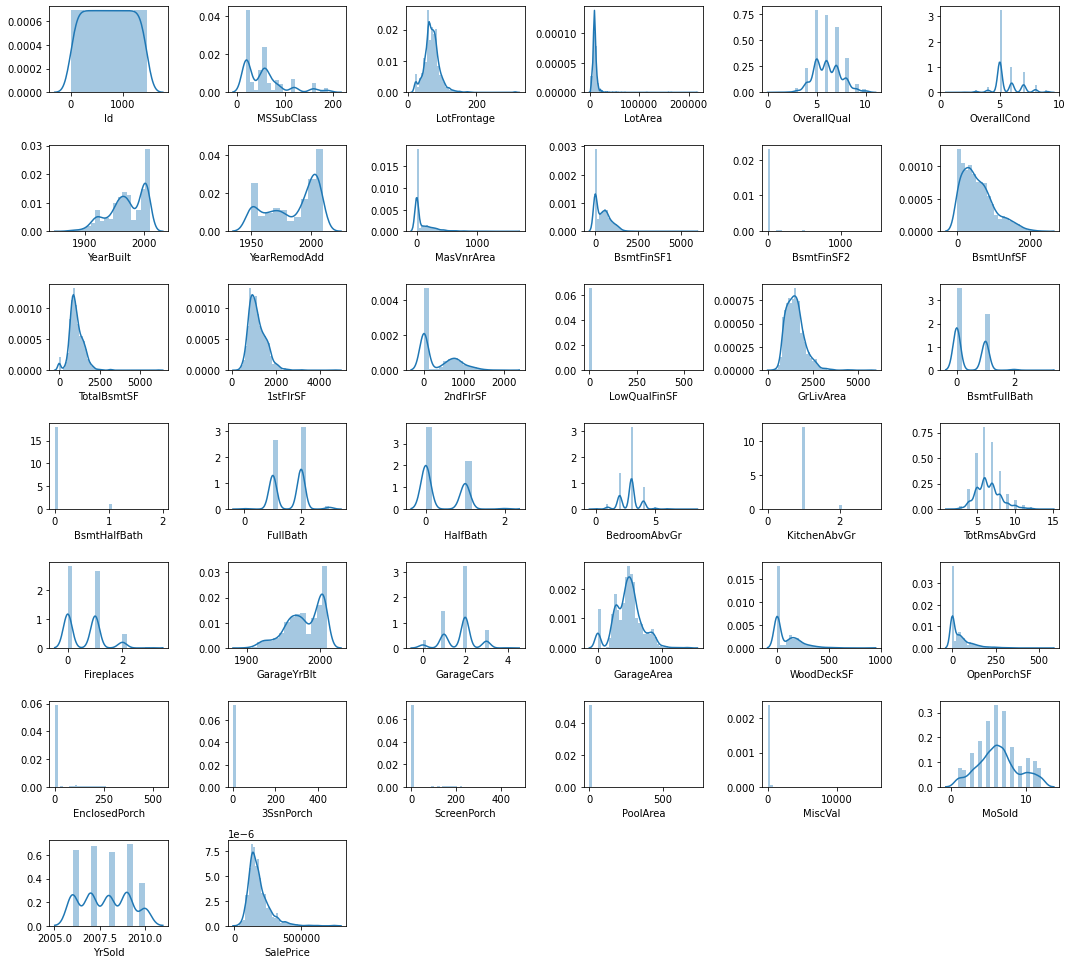

In [7]:
count=1
plt.subplots(figsize=(15, 15))
for i in numerical_cols:
    plt.subplot(8,6,count)
    sns.distplot(suprise[i])
    count+=1
    
plt.tight_layout()
plt.show()

### Statistical Understanding of Numerical Features

In [8]:
suprise[numerical_cols].describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## 2) Data Cleaning

    Things to Do:
        > Treating Null Values
        > Identifying Duplicates, Data Types inconsistency, Typos, Extra spaces, Spell Check, Irrelevant observations
        > Identifying outliers
        > Scaling Features

### 2.1 Treating Null Values

### Identifying features with Null Values in it

In [9]:
round((suprise.isnull().sum()/len(suprise.index))*100,2).sort_values(ascending = False).head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Utilities        0.00
dtype: float64

In [10]:
null_features = suprise.columns[round((suprise.isnull().sum()/len(suprise.index))*100,2) > 80]
null_features

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

### Let's Drop the columns which has more than 80% of null values in it, As imputing values will also result in data bias

In [11]:
# Droping above columns from the DataFrame
suprise.drop(columns = null_features,axis = 1, inplace = True)

### column - FireplaceQu Fireplace quality

In [12]:
suprise.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [13]:
# Total Number of observations with Null Values
suprise.FireplaceQu.isnull().sum()

690

### Imputing null values with 'No' 

In [14]:
suprise.FireplaceQu.fillna('No',inplace = True)

### Checking out other features with lower number of null Values

In [15]:
suprise.FireplaceQu.value_counts()

No    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [16]:
round((suprise.isnull().sum()/len(suprise.index))*100,2).sort_values(ascending = False).head(20)

LotFrontage     17.74
GarageFinish     5.55
GarageType       5.55
GarageCond       5.55
GarageQual       5.55
GarageYrBlt      5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
RoofStyle        0.00
RoofMatl         0.00
SalePrice        0.00
Exterior1st      0.00
Exterior2nd      0.00
YearBuilt        0.00
dtype: float64

### column: LotFrontage : Linear feet of street connected to property    

In [17]:
suprise.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [18]:
# Total Number of observations with Null Values
suprise.LotFrontage.isnull().sum()

259

### Let's impute Null values with Median value of the column i.e. 69

In [19]:
suprise.LotFrontage = suprise.LotFrontage.fillna(suprise['LotFrontage'].median())

In [20]:
round((suprise.isnull().sum()/len(suprise.index))*100,2).sort_values(ascending = False).head(20)

GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageCond      5.55
GarageQual      5.55
BsmtExposure    2.60
BsmtFinType2    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
RoofMatl        0.00
RoofStyle       0.00
SalePrice       0.00
Exterior1st     0.00
Exterior2nd     0.00
YearBuilt       0.00
ExterQual       0.00
dtype: float64

### Column - GarageType, GarageYrBlt, GarageFinish, GarageCond, GarageQual

In [21]:
suprise[suprise.GarageType.isnull() 
        & suprise.GarageYrBlt.isnull() 
        & suprise.GarageFinish.isnull() 
        & suprise.GarageCond.isnull() 
        & suprise.GarageQual.isnull()
       ].head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,No,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.0,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,No,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,0,6,2009,New,Partial,113000
78,79,90,RL,72.0,10778,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,No,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.0,8470,Pave,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,No,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.0,8070,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,No,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,8,2007,WD,Normal,123600
99,100,20,RL,77.0,9320,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1959,1959,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,569,Unf,0,381,950,GasA,Fa,Y,SBrkr,1225,0,0,1225,1,0,1,1,3,1,TA,6,Typ,0,No,NaN,NaN,NaN,0,0,NaN,NaN,Y,352,0,0,0,0,0,400,1,2010,WD,Normal,128950
108,109,50,RM,85.0,8500,Pave,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1919,2005,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,793,793,GasW,TA,N,FuseF,997,520,0,1517,0,0,2,0,3,1,Fa,7,Typ,0,No,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,144,0,0,0,0,8,2007,WD,Normal,115000
125,126,190,RM,60.0,6780,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,6,8,1935,1982,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,TA,Av,GLQ,490,Unf,0,30,520,GasA,Gd,N,SBrkr,520,0,234,754,1,0,1,0,2,1,TA,5,Typ,0,No,NaN,NaN,NaN,0,0,NaN,NaN,N,53,0,0,0,0,0,0,6,2006,WD,Normal,84500
127,128,45,RM,55.0,4388,Pave,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Unf,5,7,1930,1950,Gable,CompShg,WdShing,Wd Sdng,None,0.0,TA,Gd,BrkTil,TA,TA,No,LwQ,116,Unf,0,556,672,GasA,Ex,Y,SBrkr,840,0,0,840,0,0,1,0,3,1,TA,5,Typ,1,TA,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,6,2007,WD,Normal,87000
140,141,20,RL,70.0,10500,Pave,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1971,1971,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,432,Unf,0,432,864,GasA,TA,Y,SBrkr,864,0,0,864,0,0,1,0,3,1,TA,5,Typ,1,Po,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,4,2010,ConLI,Normal,115000


In [22]:
print('GarageType Datatype: ' + str(suprise.GarageType.dtype) + ' || Null Counts: ' +  str(suprise.GarageType.isnull().sum()))
print('GarageYrBlt Datatype: ' + str(suprise.GarageYrBlt.dtype) + ' || Null Counts: ' +  str(suprise.GarageType.isnull().sum()))
print('GarageFinish Datatype: ' + str(suprise.GarageFinish.dtype)  + ' || Null Counts: ' +  str(suprise.GarageType.isnull().sum()))
print('GarageCond Datatype: ' + str(suprise.GarageCond.dtype)  + ' || Null Counts: ' +  str(suprise.GarageType.isnull().sum()))
print('GarageQual Datatype: ' + str(suprise.GarageQual.dtype) + ' || Null Counts: ' +  str(suprise.GarageType.isnull().sum()))

GarageType Datatype: object || Null Counts: 81
GarageYrBlt Datatype: float64 || Null Counts: 81
GarageFinish Datatype: object || Null Counts: 81
GarageCond Datatype: object || Null Counts: 81
GarageQual Datatype: object || Null Counts: 81


### As there 81 observations which has no Garage in there house, instead of removing the observations we should be replacing Nulls with 'No' for object type features and '0' with float/year feature

In [23]:
suprise.GarageType.fillna('No',inplace = True)
suprise.GarageFinish.fillna('No',inplace = True)
suprise.GarageCond.fillna('No',inplace = True)
suprise.GarageQual.fillna('No',inplace = True)
suprise.GarageYrBlt.fillna(0,inplace = True)

### Column - BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual

In [24]:
round((suprise.isnull().sum()/len(suprise.index))*100,2).sort_values(ascending = False).head(20)

BsmtFinType2    2.60
BsmtExposure    2.60
BsmtQual        2.53
BsmtFinType1    2.53
BsmtCond        2.53
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
ExterQual       0.00
RoofMatl        0.00
Exterior1st     0.00
Exterior2nd     0.00
SalePrice       0.00
ExterCond       0.00
Foundation      0.00
YearRemodAdd    0.00
BsmtFinSF1      0.00
BsmtFinSF2      0.00
RoofStyle       0.00
YearBuilt       0.00
dtype: float64

In [25]:
print('BsmtFinType2 Datatype: ' + str(suprise.BsmtFinType2.dtype) + ' || Null Counts: ' +  str(suprise.BsmtFinType2.isnull().sum()))
print('BsmtExposure Datatype: ' + str(suprise.BsmtExposure.dtype) + ' || Null Counts: ' +  str(suprise.BsmtExposure.isnull().sum()))
print('BsmtFinType1 Datatype: ' + str(suprise.BsmtFinType1.dtype)  + ' || Null Counts: ' +  str(suprise.BsmtFinType1.isnull().sum()))
print('BsmtCond Datatype: ' + str(suprise.BsmtCond.dtype)  + ' || Null Counts: ' +  str(suprise.BsmtCond.isnull().sum()))
print('BsmtQual Datatype: ' + str(suprise.BsmtQual.dtype) + ' || Null Counts: ' +  str(suprise.BsmtQual.isnull().sum()))

BsmtFinType2 Datatype: object || Null Counts: 38
BsmtExposure Datatype: object || Null Counts: 38
BsmtFinType1 Datatype: object || Null Counts: 37
BsmtCond Datatype: object || Null Counts: 37
BsmtQual Datatype: object || Null Counts: 37


In [26]:
suprise[suprise.BsmtFinType2.isnull() 
        & suprise.BsmtExposure.isnull() 
        & suprise.BsmtFinType1.isnull() 
        & suprise.BsmtCond.isnull() 
        & suprise.BsmtQual.isnull()
       ].head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
17,18,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,No,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,No,No,0.0,No,0,0,No,No,N,0,0,0,0,0,0,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,No,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,No,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,No,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,0,6,2006,WD,Normal,109500
182,183,20,RL,60.0,9060,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Artery,Norm,1Fam,1Story,5,6,1957,2006,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,98.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1340,0,0,1340,0,0,1,0,3,1,TA,7,Typ,1,Gd,Attchd,1957.0,RFn,1,252,TA,TA,Y,116,0,0,180,0,0,0,6,2007,WD,Normal,120000
259,260,20,RM,70.0,12702,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Gd,Y,FuseA,882,0,0,882,0,0,1,0,2,1,TA,4,Typ,0,No,Detchd,1956.0,Unf,1,308,TA,TA,Y,0,45,0,0,0,0,0,12,2008,WD,Normal,97000
342,343,90,RL,69.0,8544,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,3,4,1949,1950,Gable,CompShg,Stucco,Stucco,BrkFace,340.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,Wall,Fa,N,FuseA,1040,0,0,1040,0,0,2,0,2,2,TA,6,Typ,0,No,Detchd,1949.0,Unf,2,400,TA,TA,Y,0,0,0,0,0,0,0,5,2006,WD,Normal,87500
362,363,85,RL,64.0,7301,Pave,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,SFoyer,7,5,2003,2003,Gable,CompShg,HdBoard,HdBoard,BrkFace,500.0,Gd,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,495,1427,0,1922,0,0,3,0,4,1,Gd,7,Typ,1,Ex,BuiltIn,2003.0,RFn,2,672,TA,TA,Y,0,0,177,0,0,0,0,7,2009,ConLD,Normal,198500
371,372,50,RL,80.0,17120,Pave,Reg,Lvl,AllPub,Inside,Gtl,ClearCr,Feedr,Norm,1Fam,1.5Fin,4,4,1959,1959,Gable,CompShg,WdShing,Plywood,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1120,468,0,1588,0,0,2,0,4,1,TA,7,Min2,1,Gd,Detchd,1991.0,Fin,2,680,TA,TA,N,0,59,0,0,0,0,0,7,2008,WD,Normal,134432


### As all these features are related to Basement, instead of removing these observations best is we impute 'No' for null values which would identify that these observations does not have Basement

In [27]:
suprise.BsmtFinType2.fillna('No',inplace = True)
suprise.BsmtExposure .fillna('No',inplace = True)
suprise.BsmtFinType1.fillna('No',inplace = True)
suprise.BsmtCond.fillna('No',inplace = True)
suprise.BsmtQual.fillna('No',inplace = True)

In [28]:
round((suprise.isnull().sum()/len(suprise.index))*100,2).sort_values(ascending = False).head(20)

MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
SalePrice       0.00
Foundation      0.00
RoofMatl        0.00
Exterior1st     0.00
Exterior2nd     0.00
ExterQual       0.00
ExterCond       0.00
BsmtQual        0.00
YearRemodAdd    0.00
BsmtCond        0.00
BsmtExposure    0.00
BsmtFinType1    0.00
BsmtFinSF1      0.00
BsmtFinType2    0.00
BsmtFinSF2      0.00
RoofStyle       0.00
YearBuilt       0.00
dtype: float64

### column - MasVnrType, MasVnrArea

In [29]:
suprise.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [30]:
suprise.MasVnrArea.value_counts().head()

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
Name: MasVnrArea, dtype: int64

In [31]:
print('MasVnrType Datatype: ' + str(suprise.MasVnrType.dtype) + ' || Null Counts: ' +  str(suprise.MasVnrType.isnull().sum()))
print('MasVnrArea Datatype: ' + str(suprise.MasVnrArea.dtype) + ' || Null Counts: ' +  str(suprise.MasVnrArea.isnull().sum()))

MasVnrType Datatype: object || Null Counts: 8
MasVnrArea Datatype: float64 || Null Counts: 8


### Imputing 'No' and 0 with Null values

In [32]:
suprise.MasVnrType.fillna('No',inplace = True)
suprise.MasVnrArea.fillna(0,inplace = True)

### column - Electrical

In [33]:
suprise.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [34]:
suprise[suprise.Electrical.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,No,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,0,5,2008,WD,Normal,167500


### There is only one observation with missing electrical value, as it is a categorical value, let's impute it with Mode

In [35]:
suprise.Electrical.mode()

0    SBrkr
dtype: object

In [36]:
suprise['Electrical'].fillna('SBrkr',inplace = True)

In [37]:
round((suprise.isnull().sum()/len(suprise.index))*100,2).sort_values(ascending = False).head(20)

SalePrice       0.0
ExterCond       0.0
RoofStyle       0.0
RoofMatl        0.0
Exterior1st     0.0
Exterior2nd     0.0
MasVnrType      0.0
MasVnrArea      0.0
ExterQual       0.0
Foundation      0.0
TotalBsmtSF     0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinSF1      0.0
BsmtFinType2    0.0
BsmtFinSF2      0.0
YearRemodAdd    0.0
YearBuilt       0.0
dtype: float64

## Now we have finished handling Null values

### 2.2 Identifying Duplicates, Data Types inconsistency, Typos, Extra spaces, Spell Check, Irrelevant observations

In [38]:
suprise.select_dtypes('object')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,No,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,No,Attchd,Unf,TA,TA,Y,WD,Normal


### Going through each categorical variable to identify in data inconsistency

In [39]:
for i in suprise.select_dtypes('object').columns:
    print(suprise[i].value_counts())
    print('\n')

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


Pave    1454
Grvl       6
Name: Street, dtype: int64


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64


Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64


Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64


Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64


NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


Norm      1260
Feedr     

### Column - MSZoning = Removing (all) from the 'C (all)' category

In [40]:
suprise['MSZoning'][suprise.MSZoning == 'C (all)'] = 'C'

In [41]:
suprise.MSZoning.value_counts()

RL    1151
RM     218
FV      65
RH      16
C       10
Name: MSZoning, dtype: int64

### column - LotShape = Reducing into 2 categories Regular & Irregular

In [42]:
suprise.LotShape.value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [43]:
suprise['LotShape'][suprise.LotShape.isin(['IR1','IR2','IR3'])] = 'IR'

In [44]:
suprise.LotShape.value_counts()

Reg    925
IR     535
Name: LotShape, dtype: int64

### column - LandContour = Reducing into 2 categories Lvl or up_down_slope

In [45]:
suprise.LandContour.value_counts()

Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

In [46]:
suprise['LandContour'][suprise.LandContour.isin(['Bnk','HLS','Low'])] = 'up_down_slope'

In [47]:
suprise.LandContour.value_counts()

Lvl              1311
up_down_slope     149
Name: LandContour, dtype: int64

### column - Neighborhood = Names spell check

In [48]:
suprise.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [49]:
suprise['Neighborhood'][suprise.Neighborhood == 'NAmes'] = 'Names'

### column - MSSubClass = Grouping small categories

In [51]:
def cat_mssubclass(val):
    if val in (20,30,40,120):
        return '1bhk'
    elif val in (45,50,150):
        return '1.5bhk'
    elif val in (60,70,75,160,190):
        return '2bhk'
    else:
        return 'Others'

In [52]:
suprise.MSSubClass = suprise.MSSubClass.map(lambda x:cat_mssubclass(x))

In [53]:
suprise.MSSubClass.value_counts()

1bhk      696
2bhk      468
1.5bhk    156
Others    140
Name: MSSubClass, dtype: int64

### Simplifying category by moving all near railway station to near_station and adjacent street to near_street

In [54]:
suprise['Condition1'][suprise.Condition1.isin(['RRAn','PosN','RRAe','PosA','RRNn','RRNe'])] = 'near_station'
suprise['Condition1'][suprise.Condition1.isin(['Feedr','Artery'])] = 'near_street'

In [55]:
suprise.Condition1.value_counts()

Norm            1260
near_street      129
near_station      71
Name: Condition1, dtype: int64

### Column - HouseStyle

In [56]:
suprise.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

### Let's clean the values with replace '.' by '_' and adding '_' af few values

In [57]:
suprise.HouseStyle.replace('1.5Fin','1_5Fin',inplace = True)
suprise.HouseStyle.replace('1.5Unf','1_5Unf',inplace = True)
suprise.HouseStyle.replace('2.5Unf','2_5Unf',inplace = True)
suprise.HouseStyle.replace('2.5Fin','2_5Fin',inplace = True)
suprise.HouseStyle.replace('1Story','1_Story',inplace = True)
suprise.HouseStyle.replace('2Story','2_Story',inplace = True)

In [58]:
suprise.HouseStyle.value_counts()

1_Story    726
2_Story    445
1_5Fin     154
SLvl        65
SFoyer      37
1_5Unf      14
2_5Unf      11
2_5Fin       8
Name: HouseStyle, dtype: int64

### Simplifying all Rating Columns to 3 Categories Excellent, Good & Poor

### column - OverallQual & OverallCond = Simplifying category to 3 simple category Excellent, Good, Poor

In [59]:
suprise.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [60]:
def cat_overall(val):
    if val in (8,9,10):
        return 1
    if val in (5,6,7):
        return 2
    if val in (1,2,3,4):
        return 3    


suprise['OverallQual'] = suprise['OverallQual'].apply(cat_overall)

In [61]:
suprise.OverallQual.value_counts()

2    1090
1     229
3     141
Name: OverallQual, dtype: int64

In [62]:
suprise.OverallCond.value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [63]:
suprise['OverallCond'] = suprise['OverallCond'].apply(cat_overall)

In [64]:
suprise.OverallCond.value_counts()

2    1278
1      94
3      88
Name: OverallCond, dtype: int64

### Simplifying Cateogories
    > Ex & Gd = Excellent
    > TA & Fa = Good
    > Po & No = Poor

In [65]:
def simp_cat(val):
    if val in ('Ex','TA'):
        return 1
    elif val in ('Gd','Fa'):
        return 2
    elif val in ('Po','No'):
        return 3
    else:
        return val
    
suprise.ExterQual = suprise.ExterQual.map(lambda x:simp_cat(x))
suprise.ExterCond = suprise.ExterCond.map(lambda x:simp_cat(x))
suprise.BsmtQual = suprise.BsmtQual.map(lambda x:simp_cat(x))
suprise.BsmtCond = suprise.BsmtCond.map(lambda x:simp_cat(x))
suprise.HeatingQC = suprise.HeatingQC.map(lambda x:simp_cat(x))
suprise.GarageQual = suprise.GarageQual.map(lambda x:simp_cat(x))
suprise.GarageCond = suprise.GarageCond.map(lambda x:simp_cat(x))
suprise.KitchenQual = suprise.KitchenQual.map(lambda x:simp_cat(x))
suprise.FireplaceQu = suprise.FireplaceQu.map(lambda x:simp_cat(x))

In [66]:
suprise.ExterQual.value_counts()

1    958
2    502
Name: ExterQual, dtype: int64

In [67]:
suprise.ExterCond.value_counts()

1    1285
2     174
3       1
Name: ExterCond, dtype: int64

In [68]:
suprise.BsmtQual.value_counts()

1    770
2    653
3     37
Name: BsmtQual, dtype: int64

In [69]:
suprise.BsmtCond.value_counts()

1    1311
2     110
3      39
Name: BsmtCond, dtype: int64

In [70]:
suprise.HeatingQC.value_counts()

1    1169
2     290
3       1
Name: HeatingQC, dtype: int64

In [71]:
suprise.GarageQual.value_counts()

1    1314
3      84
2      62
Name: GarageQual, dtype: int64

In [72]:
suprise.GarageCond.value_counts()

1    1328
3      88
2      44
Name: GarageCond, dtype: int64

In [73]:
suprise.KitchenQual.value_counts()

1    835
2    625
Name: KitchenQual, dtype: int64

In [74]:
suprise.FireplaceQu.value_counts()

3    710
2    413
1    337
Name: FireplaceQu, dtype: int64

### Column - SaleType = Reducing Categories

In [75]:
suprise.SaleType.value_counts()

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

In [76]:
suprise['SaleType'][suprise.SaleType.isin(['ConLD','ConLw','ConLI','Con'])] = 'Con'
suprise['SaleType'][suprise.SaleType.isin(['CWD'])] = 'WD'
suprise['SaleType'][suprise.SaleType.isin(['COD'])] = 'Oth'

In [77]:
suprise.SaleType.value_counts()

WD     1271
New     122
Oth      46
Con      21
Name: SaleType, dtype: int64

In [78]:
#We will create range of dates for binning.
#Below function assigns a bin value to dates based on condition. 
def get_construction_Date_range(value):
    if value<=1950:
        return 'Very Old'
    elif ((value<=1975)):
        return 'Old'
    elif ((value<=1990)):
        return 'Average'
    else:
        return 'New'

### Update feature YearRemodAdd & GarageYrBlt with  Very old, Old, Average or New value as per respective dates

In [79]:
suprise['YearRemodAdd']=suprise['YearRemodAdd'].apply(lambda x : get_construction_Date_range(x))
suprise['GarageYrBlt']=suprise['GarageYrBlt'].apply(lambda x : get_construction_Date_range(x))

### Derived feature

In [80]:
#Getting the age of the houses
suprise['CurrentYear'] = datetime.datetime.now().year
suprise["Age"] = suprise['CurrentYear'] - suprise['YearBuilt']
suprise.drop(['CurrentYear', 'YearBuilt'], axis = 1, inplace = True)

In [81]:
## TotalHouseSF: The total Square Foot of the house
suprise["TotalHouseSF"] = suprise["TotalBsmtSF"] + suprise["1stFlrSF"] + suprise["2ndFlrSF"]

In [82]:
## TotalBath: The total number of bathrooms in the house
suprise["TotalBath"] = suprise["BsmtFullBath"] + suprise["BsmtFullBath"]*0.5 + suprise["FullBath"] + suprise["HalfBath"]*0.5

In [83]:
## TotalPorchSF: The total square foot of porch area of the house
suprise["TotalPorchSF"] = suprise["WoodDeckSF"] + suprise["OpenPorchSF"] + suprise["EnclosedPorch"] + suprise["3SsnPorch"] + suprise["ScreenPorch"] 

### Identifying Features which have distribution biased more than 90%

In [84]:
bias_feat = []
for feat in suprise.columns:
    counts = suprise[feat].value_counts().iloc[0] ## mode value counts
    if (counts / len(suprise) * 100) > 90:
        bias_feat.append(feat)
bias_feat        

['Street',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

### Checking the biasness by reducing features as requried

In [85]:
suprise[bias_feat]

,Street,Utilities,LandSlope,Condition2,RoofMatl,Heating,CentralAir,Electrical,LowQualFinSF,BsmtHalfBath,KitchenAbvGr,Functional,GarageCond,PavedDrive,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,Pave,AllPub,Gtl,Norm,CompShg,GasA,Y,SBrkr,0,0,1,Typ,1,Y,0,0,0,0
1,Pave,AllPub,Gtl,Norm,CompShg,GasA,Y,SBrkr,0,1,1,Typ,1,Y,0,0,0,0
2,Pave,AllPub,Gtl,Norm,CompShg,GasA,Y,SBrkr,0,0,1,Typ,1,Y,0,0,0,0
3,Pave,AllPub,Gtl,Norm,CompShg,GasA,Y,SBrkr,0,0,1,Typ,1,Y,0,0,0,0
4,Pave,AllPub,Gtl,Norm,CompShg,GasA,Y,SBrkr,0,0,1,Typ,1,Y,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Pave,AllPub,Gtl,Norm,CompShg,GasA,Y,SBrkr,0,0,1,Typ,1,Y,0,0,0,0
1456,Pave,AllPub,Gtl,Norm,CompShg,GasA,Y,SBrkr,0,0,1,Min1,1,Y,0,0,0,0
1457,Pave,AllPub,Gtl,Norm,CompShg,GasA,Y,SBrkr,0,0,1,Typ,1,Y,0,0,0,2500
1458,Pave,AllPub,Gtl,Norm,CompShg,GasA,Y,FuseA,0,0,1,Typ,1,Y,0,0,0,0


### Categorizing the observations of these features to simplify while model building, We would be converting the categories of ordinal features into 0,1,2..  to simplify the model

### And would be deleting features which have very high Biasness

### column = Street

In [86]:
suprise.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [87]:
suprise.drop('Street',axis = 1,inplace = True)

### column = Utilities

In [88]:
suprise.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

### As we can see that there is only one observation with NoSeWa= Electricity and Gas Only, So it's better to drop this column

In [89]:
suprise.drop('Utilities',axis = 1,inplace = True)

### column = Condition2

In [90]:
suprise.Condition2.value_counts()

Norm      1445
Feedr        6
Artery       2
PosN         2
RRNn         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

In [91]:
suprise['Condition2'] = suprise['Condition2'].apply(lambda x: 'Other' if x != 'Norm' else x)
suprise.Condition2.value_counts()

Norm     1445
Other      15
Name: Condition2, dtype: int64

### column = RoofMatl

In [92]:
suprise.RoofMatl.value_counts()

CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
ClyTile       1
Roll          1
Membran       1
Metal         1
Name: RoofMatl, dtype: int64

In [93]:
suprise['RoofMatl'] = suprise['RoofMatl'].apply(lambda x: 'Other' if x != 'CompShg' else x)
suprise.RoofMatl.value_counts()

CompShg    1434
Other        26
Name: RoofMatl, dtype: int64

### column = Heating

In [94]:
suprise.Heating.value_counts()

GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [95]:
suprise['Heating'] = suprise['Heating'].apply(lambda x: 'Other' if x != 'GasA' else x)
suprise.Heating.value_counts()

GasA     1428
Other      32
Name: Heating, dtype: int64

### column = CentralAir

In [96]:
suprise.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

In [97]:
suprise['CentralAir'] = suprise['CentralAir'].apply(lambda x: 1 if x == 'Y' else 0)
suprise.CentralAir.value_counts()

1    1365
0      95
Name: CentralAir, dtype: int64

### column = Electrical

In [98]:
suprise.Electrical.value_counts()

SBrkr    1335
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [99]:
suprise['Electrical'] = suprise['Electrical'].apply(lambda x: 'Other' if x != 'SBrkr' else x)
suprise.Electrical.value_counts()

SBrkr    1335
Other     125
Name: Electrical, dtype: int64

### Column = LowQualFinSF

In [100]:
suprise.LowQualFinSF.value_counts()

0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64

In [101]:
suprise.drop('LowQualFinSF',axis = 1,inplace = True)

### column = Functional

In [102]:
suprise.Functional.value_counts()

Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

In [103]:
suprise['Functional'] = suprise['Functional'].apply(lambda x: 'Other' if x != 'Typ' else x)
suprise.Functional.value_counts()

Typ      1360
Other     100
Name: Functional, dtype: int64

### column = PavedDrive

In [104]:
suprise.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

In [105]:
suprise['PavedDrive'] = suprise['PavedDrive'].apply(lambda x: 1 if x == 'Y' else 0)
suprise.PavedDrive.value_counts()

1    1340
0     120
Name: PavedDrive, dtype: int64

In [106]:
suprise.drop(columns =['3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis = 1,inplace = True)

### Finding Duplicate observations in dataset

In [107]:
suprise[suprise.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age,TotalHouseSF,TotalBath,TotalPorchSF


### As we see there are no duplicate observations in the dataset

### Let's look at the data types of all the columns now

In [108]:
suprise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearRemodAdd   1460 non-null   object 
 17  RoofStyle      1460 non-null   object 
 18  RoofMatl

### We see few features with DataType float which should be actually Integer, Below are the features:
    > LotFrontage
    > MasVnrArea

In [109]:
suprise.LotFrontage = suprise.LotFrontage.astype('int64')
suprise.MasVnrArea = suprise.MasVnrArea.astype('int64')

In [110]:
print(suprise.LotFrontage.dtypes)
print(suprise.MasVnrArea.dtypes)

int64
int64


### Let's see all the features with object datatype, and change all the datatypes to category

In [111]:
suprise.select_dtypes(include = 'object').columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical', 'Functional',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [112]:
for i in suprise.select_dtypes(include = 'object').columns:
    suprise[i] = suprise[i].astype('category')

In [113]:
suprise.select_dtypes(include = 'category').columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical', 'Functional',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')

### As our dataset is clean to a good extent for Categorical Features, Let's look into Numerical Features now

In [114]:
suprise.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,Age,TotalHouseSF,TotalBath,TotalPorchSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,69.863699,10516.828082,1.939726,1.995890,103.117123,1.343836,1.120548,1.497945,1.128767,443.639726,46.549315,567.240411,1057.429452,1.200000,0.934932,1162.626712,346.992466,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,1.428082,6.517808,0.613014,2.255479,1.767123,472.980137,1.157534,1.150685,0.917808,94.244521,46.660274,21.954110,6.321918,2007.815753,180921.195890,49.732192,2567.048630,2.394521,181.329452
std,421.610009,22.027677,9981.264932,0.499963,0.353166,180.731373,0.475150,0.327810,0.548531,0.407093,456.098091,161.319273,441.866955,438.705324,0.401846,0.246731,386.587738,436.528436,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.494970,1.625393,0.644666,0.807651,0.747315,213.804841,0.497951,0.498696,0.274751,125.338794,66.256028,61.119149,2.703626,1.328095,79442.502883,30.202904,821.714421,0.971053,156.656097
min,1.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,11.000000,334.000000,1.000000,0.000000
25%,365.750000,60.000000,7553.500000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,223.000000,795.750000,1.000000,1.000000,882.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,5.000000,0.000000,2.000000,1.000000,334.500000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,21.000000,2009.500000,1.500000,45.000000
50%,730.500000,69.000000,9478.500000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,383.500000,0.000000,477.500000,991.500000,1.000000,1.000000,1087.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000,6.000000,1.000000,2.000000,2.000000,480.000000,1.000000,1.000000,1.000000,0.000000,25.000000,0.000000,6.000000,2008.000000,163000.000000,48.000000,2474.000000,2.500000,164.000000
75%,1095.250000,79.000000,11601.500000,2.000000,2.000000,164.250000,2.000000,1.000000,2.000000,1.000000,712.250000,0.000000,808.000000,1298.250000,1.000000,1.000000,1391.250000,728.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,2.000000,7.000000,1.000000,3.000000,2.000000,576.000000,1.000000,1.000000,1.000000,168.000000,68.000000,0.000000,8.000000,2009.000000,214000.000000,67.000000,3004.000000,3.000000,266.000000
max,1460.000000,313.000000,215245.000000,3.000000,3.000000,1600.000000,2.000000,3.000000,3.000000,3.000000,5644.000000,1474.000000,2336.000000,6110.000000,3.000000,1.000000,4692.000000,2065.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,2.000000,14.000000,3.000000,3.000000,4.000000,1418.000000,3.000000,3.000000,1.000000,857.000000,547.000000,552.000000,12.000000,20

###  2.3 Finding Outliers

In [115]:
suprise.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Id,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,Age,TotalHouseSF,TotalBath,TotalPorchSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,69.863699,10516.828082,1.939726,1.995890,103.117123,1.343836,1.120548,1.497945,1.128767,443.639726,46.549315,567.240411,1057.429452,1.200000,0.934932,1162.626712,346.992466,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,1.428082,6.517808,0.613014,2.255479,1.767123,472.980137,1.157534,1.150685,0.917808,94.244521,46.660274,21.954110,6.321918,2007.815753,180921.195890,49.732192,2567.048630,2.394521,181.329452
std,421.610009,22.027677,9981.264932,0.499963,0.353166,180.731373,0.475150,0.327810,0.548531,0.407093,456.098091,161.319273,441.866955,438.705324,0.401846,0.246731,386.587738,436.528436,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.494970,1.625393,0.644666,0.807651,0.747315,213.804841,0.497951,0.498696,0.274751,125.338794,66.256028,61.119149,2.703626,1.328095,79442.502883,30.202904,821.714421,0.971053,156.656097
min,1.000000,21.000000,1300.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,334.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,11.000000,334.000000,1.000000,0.000000
25%,365.750000,60.000000,7553.500000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,223.000000,795.750000,1.000000,1.000000,882.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,5.000000,0.000000,2.000000,1.000000,334.500000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,21.000000,2009.500000,1.500000,45.000000
50%,730.500000,69.000000,9478.500000,2.000000,2.000000,0.000000,1.000000,1.000000,1.000000,1.000000,383.500000,0.000000,477.500000,991.500000,1.000000,1.000000,1087.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,1.000000,6.000000,1.000000,2.000000,2.000000,480.000000,1.000000,1.000000,1.000000,0.000000,25.000000,0.000000,6.000000,2008.000000,163000.000000,48.000000,2474.000000,2.500000,164.000000
75%,1095.250000,79.000000,11601.500000,2.000000,2.000000,164.250000,2.000000,1.000000,2.000000,1.000000,712.250000,0.000000,808.000000,1298.250000,1.000000,1.000000,1391.250000,728.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,2.000000,7.000000,1.000000,3.000000,2.000000,576.000000,1.000000,1.000000,1.000000,168.000000,68.000000,0.000000,8.000000,2009.000000,214000.000000,67.000000,3004.000000,3.000000,266.000000
90%,1314.100000,92.000000,14381.700000,2.000000,2.000000,335.000000,2.000000,2.000000,2.000000,2.000000,1065.500000,117.200000,1232.000000,1602.200000,2.000000,1.000000,1680.000000,954.200000,2158.300000,1.000000,0.000000,2.000000,1.000000,4.000000,1.000000,2.000000,9.000000,1.000000,3.000000,3.000000,757.100000,1.100000,1.000000,1.000000,262.000000,130.000000,112.000000,10.000000,2010.0000

In [116]:
suprise[suprise.LotArea > 60000][['LotArea','SalePrice']]

,LotArea,SalePrice
249,159000,277000
313,215245,375000
335,164660,228950
451,70761,280000
706,115149,302000
1298,63887,160000


### If we see above resultset, we see that there are few observations where LotArea & SalePrice are not quite correct. Even though the Lot Area is very high, the price comparatevely is low for that high Lot Area
   **So we would go ahead and drop these observations**

In [117]:
suprise = suprise[suprise['LotArea']< 60000]

### The Data on the above features have maximum values close to 0, it's best to drop these values as there is not much distribution of data in these features

In [118]:
num_cols = suprise.select_dtypes(include = 'int64').columns
num_cols

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold', 'YrSold',
       'SalePrice', 'Age', 'TotalHouseSF', 'TotalPorchSF'],
      dtype='object')

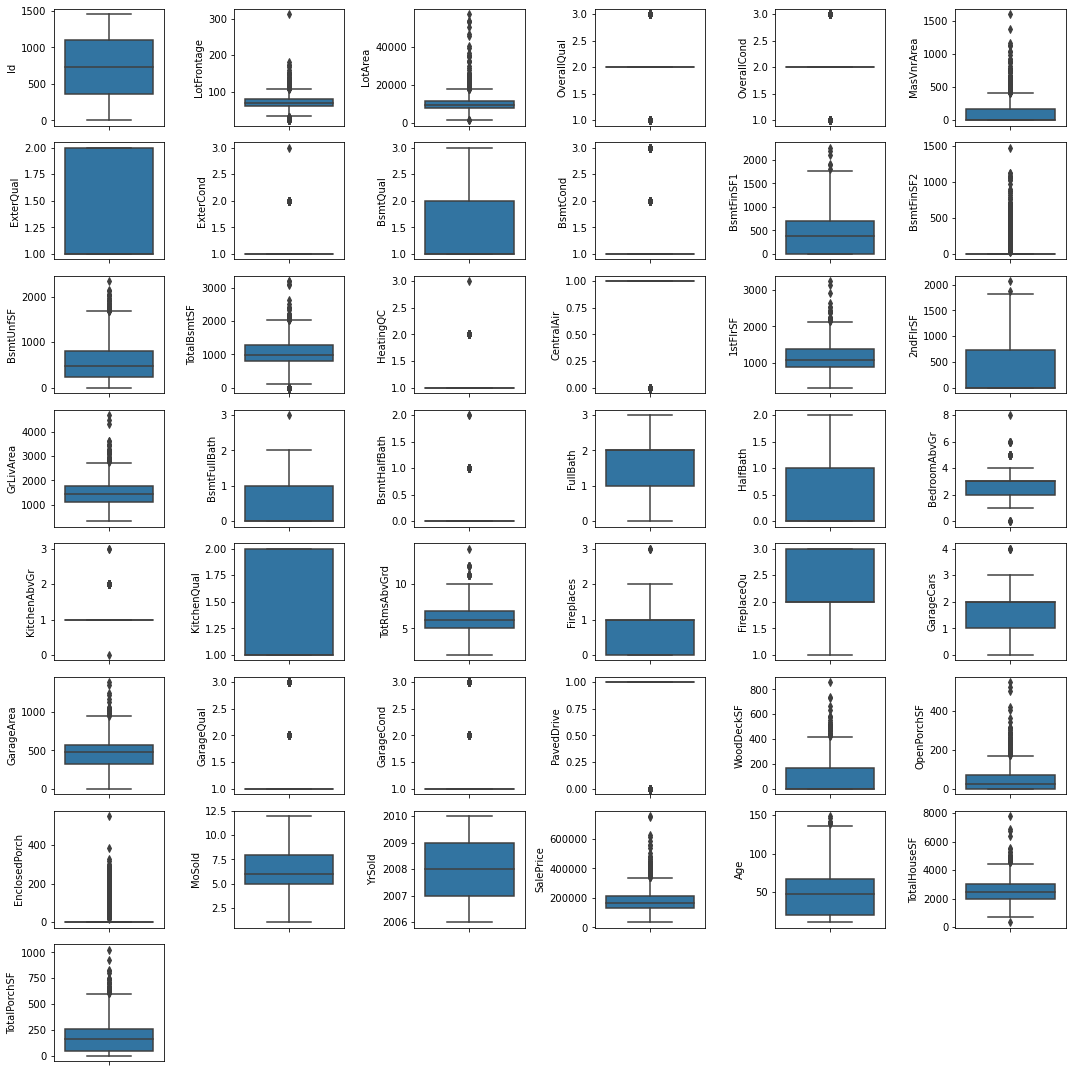

In [119]:
count=1
plt.subplots(figsize=(15, 15))
for i in num_cols:
    plt.subplot(8,6,count)
    sns.boxplot(suprise[i],orient = 'v')
    count+=1
    
plt.tight_layout()
plt.show()

In [120]:
suprise.BsmtHalfBath.value_counts()

0    1373
1      79
2       2
Name: BsmtHalfBath, dtype: int64

### Drop BsmtHalfBath feature as it does not have much distribution

In [121]:
suprise.drop(columns = 'BsmtHalfBath',inplace = True,axis = 1)

### Checking collinearity

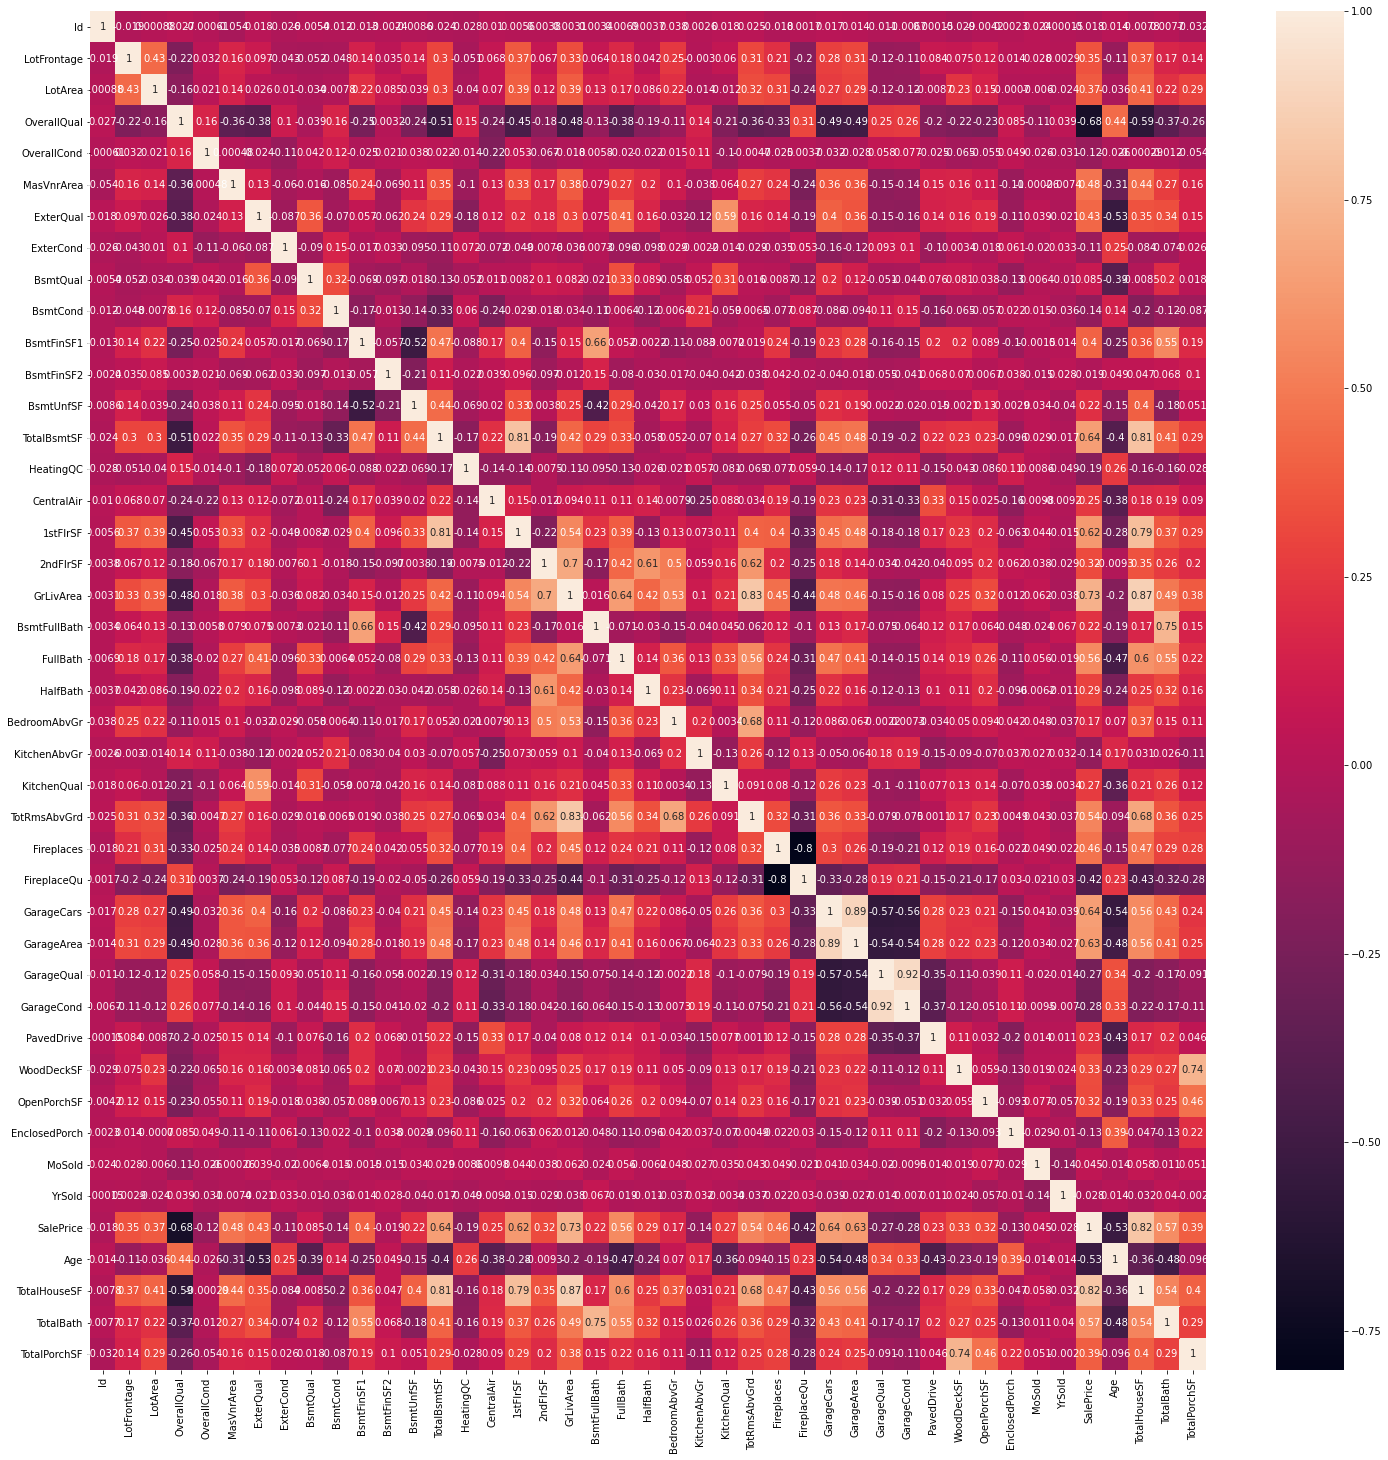

In [122]:
#plotting collineraity scores for all numeric variables
plt.figure(figsize = (25,25))
sns.heatmap(suprise.corr(),annot = True)
plt.show()

## 3) EDA

### Let's analyse our Target Variable 1st i.e. SalePrice

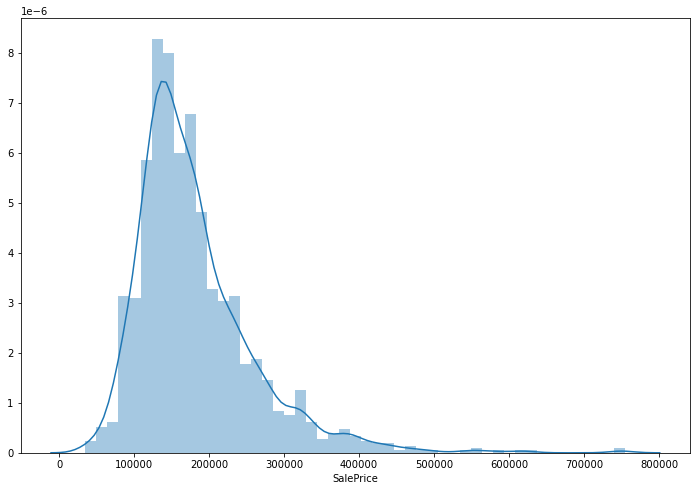

In [123]:
plt.figure(figsize=(12, 8))
sns.distplot(suprise.SalePrice)
plt.show()

### As we see our SalePrice dependent variable is left skewed, with maximum observations with price 100000 and 200000

## Univariate Analysis on Numerical Variables

In [124]:
suprise.select_dtypes('int64').columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold', 'SalePrice', 'Age', 'TotalHouseSF',
       'TotalPorchSF'],
      dtype='object')

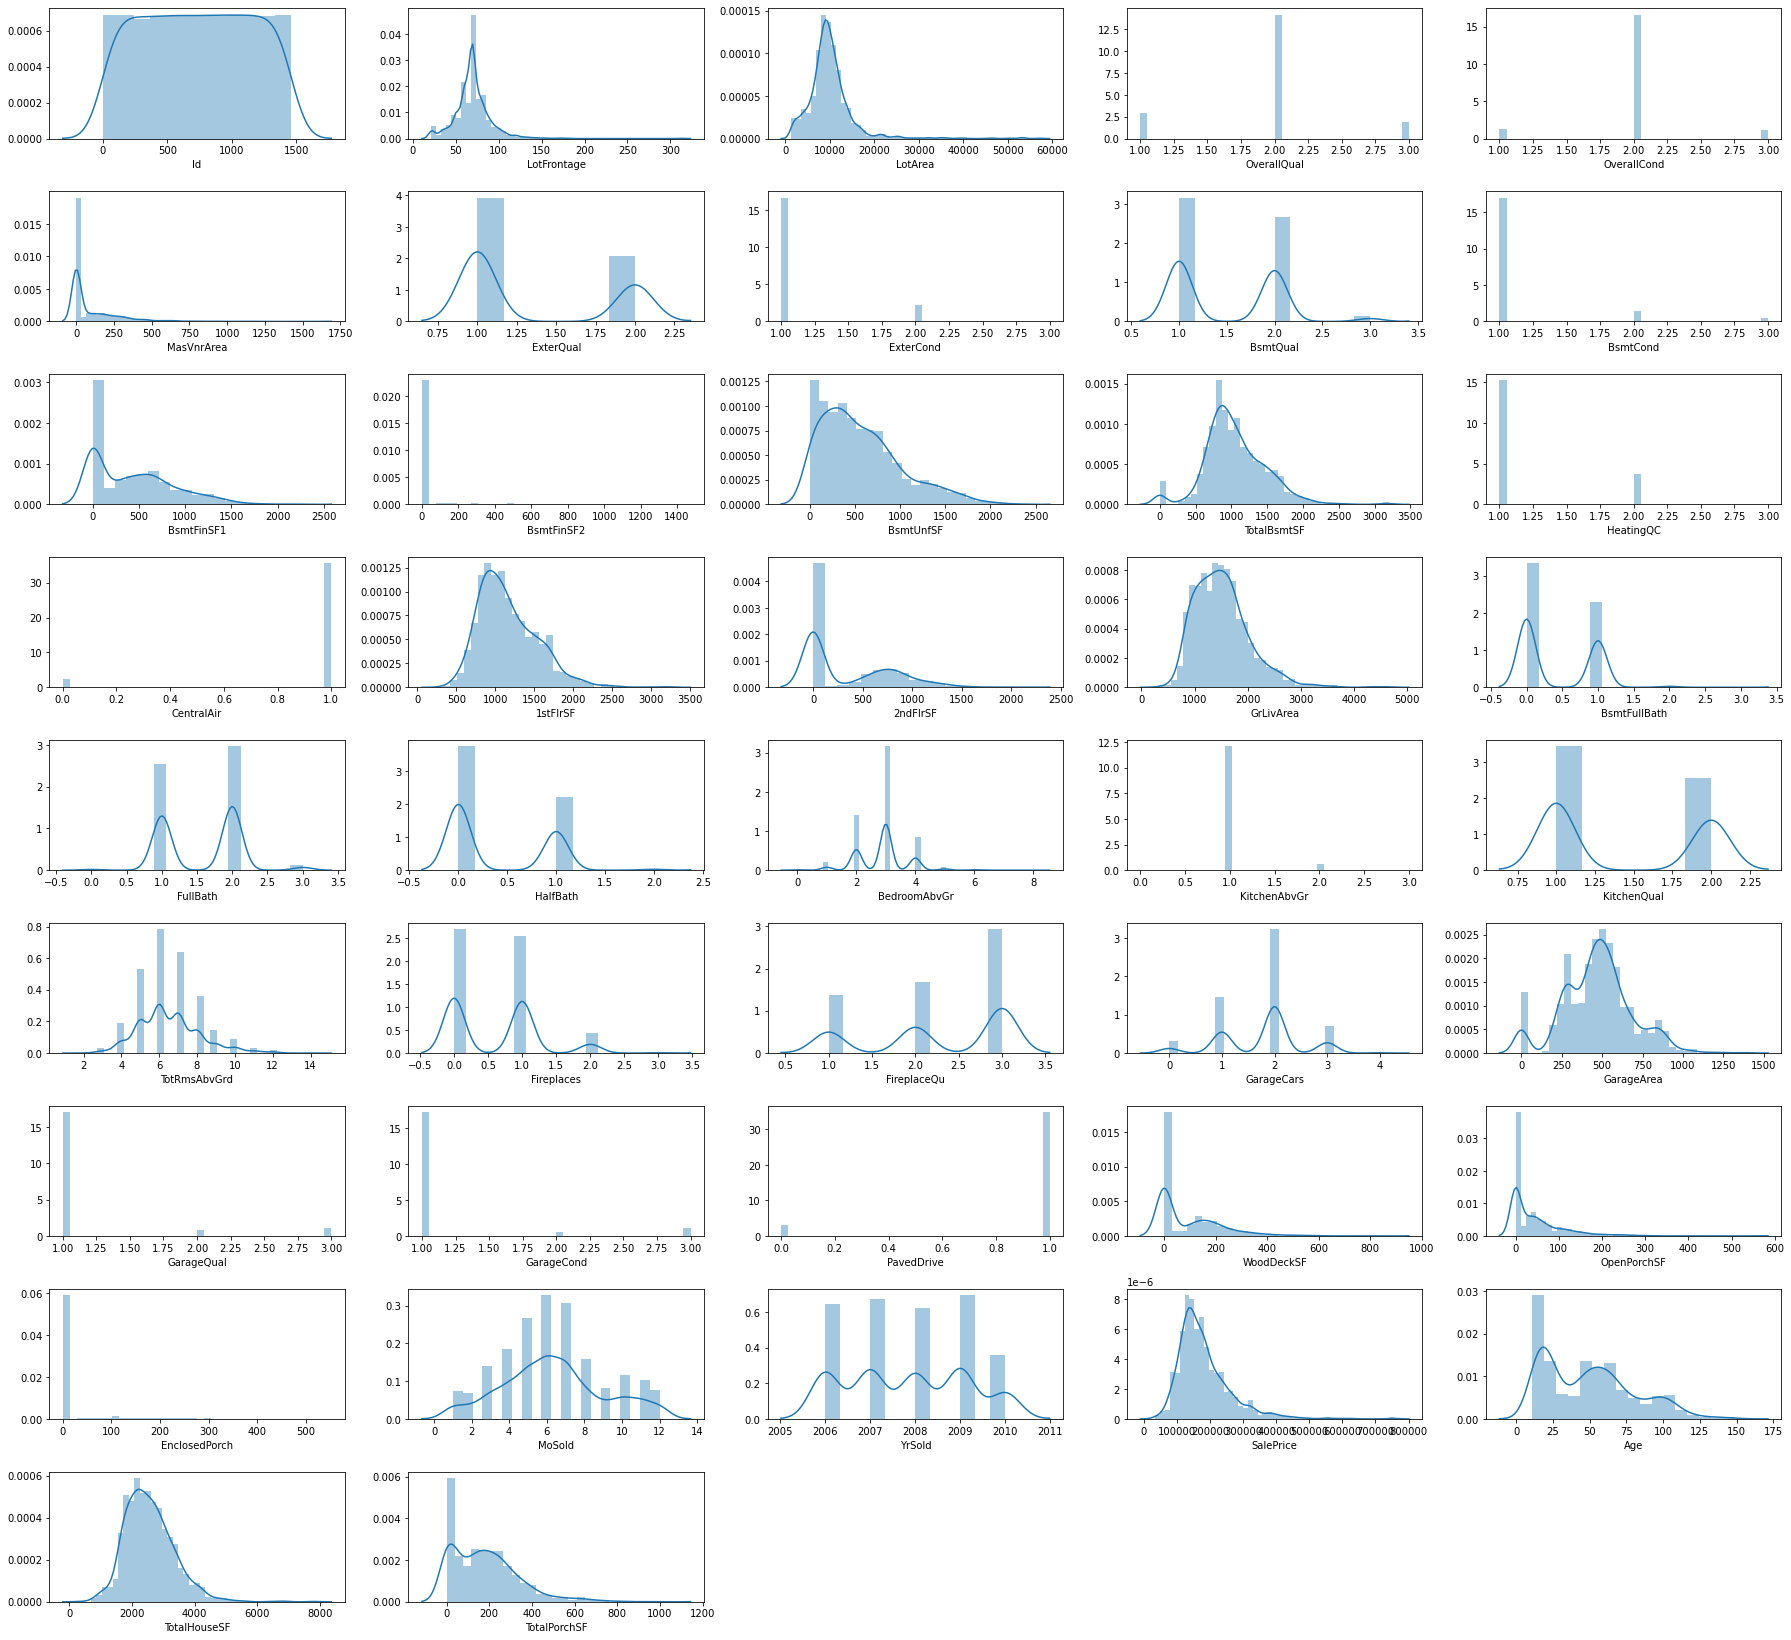

In [125]:
count=1
plt.subplots(figsize=(25, 25))
for i in suprise.select_dtypes('int64').columns:
    plt.subplot(10,5,count)
    sns.distplot(suprise[i])
    count+=1
    
plt.tight_layout()
plt.show()

### Observations:
   > **MOSold** = Which describes the month on which the Sale was done, shows us a trend of maximum sale of houses happen during June or July Month of the year
   
   > **GarageCars** = Sales of garage which can fit 2 cars has seen the highest number of sales
   
   > **Fireplaces** = Interesting observation shows that, house with 0 fire places have been sold a lot, but this can be due to lack of data for Fireplaces feature
   
   > **BedroomAbvGrnd** = 3 bedrooms above ground houses are tend to sell more in the market
   
   > **FullBath** = 2 Full bathroom houses tend to have sold more

## Bivariate Analysis

### Quick View of all the Categorical Variables Vs Sale Price

In [126]:
suprise.select_dtypes('category').columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical', 'Functional',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')

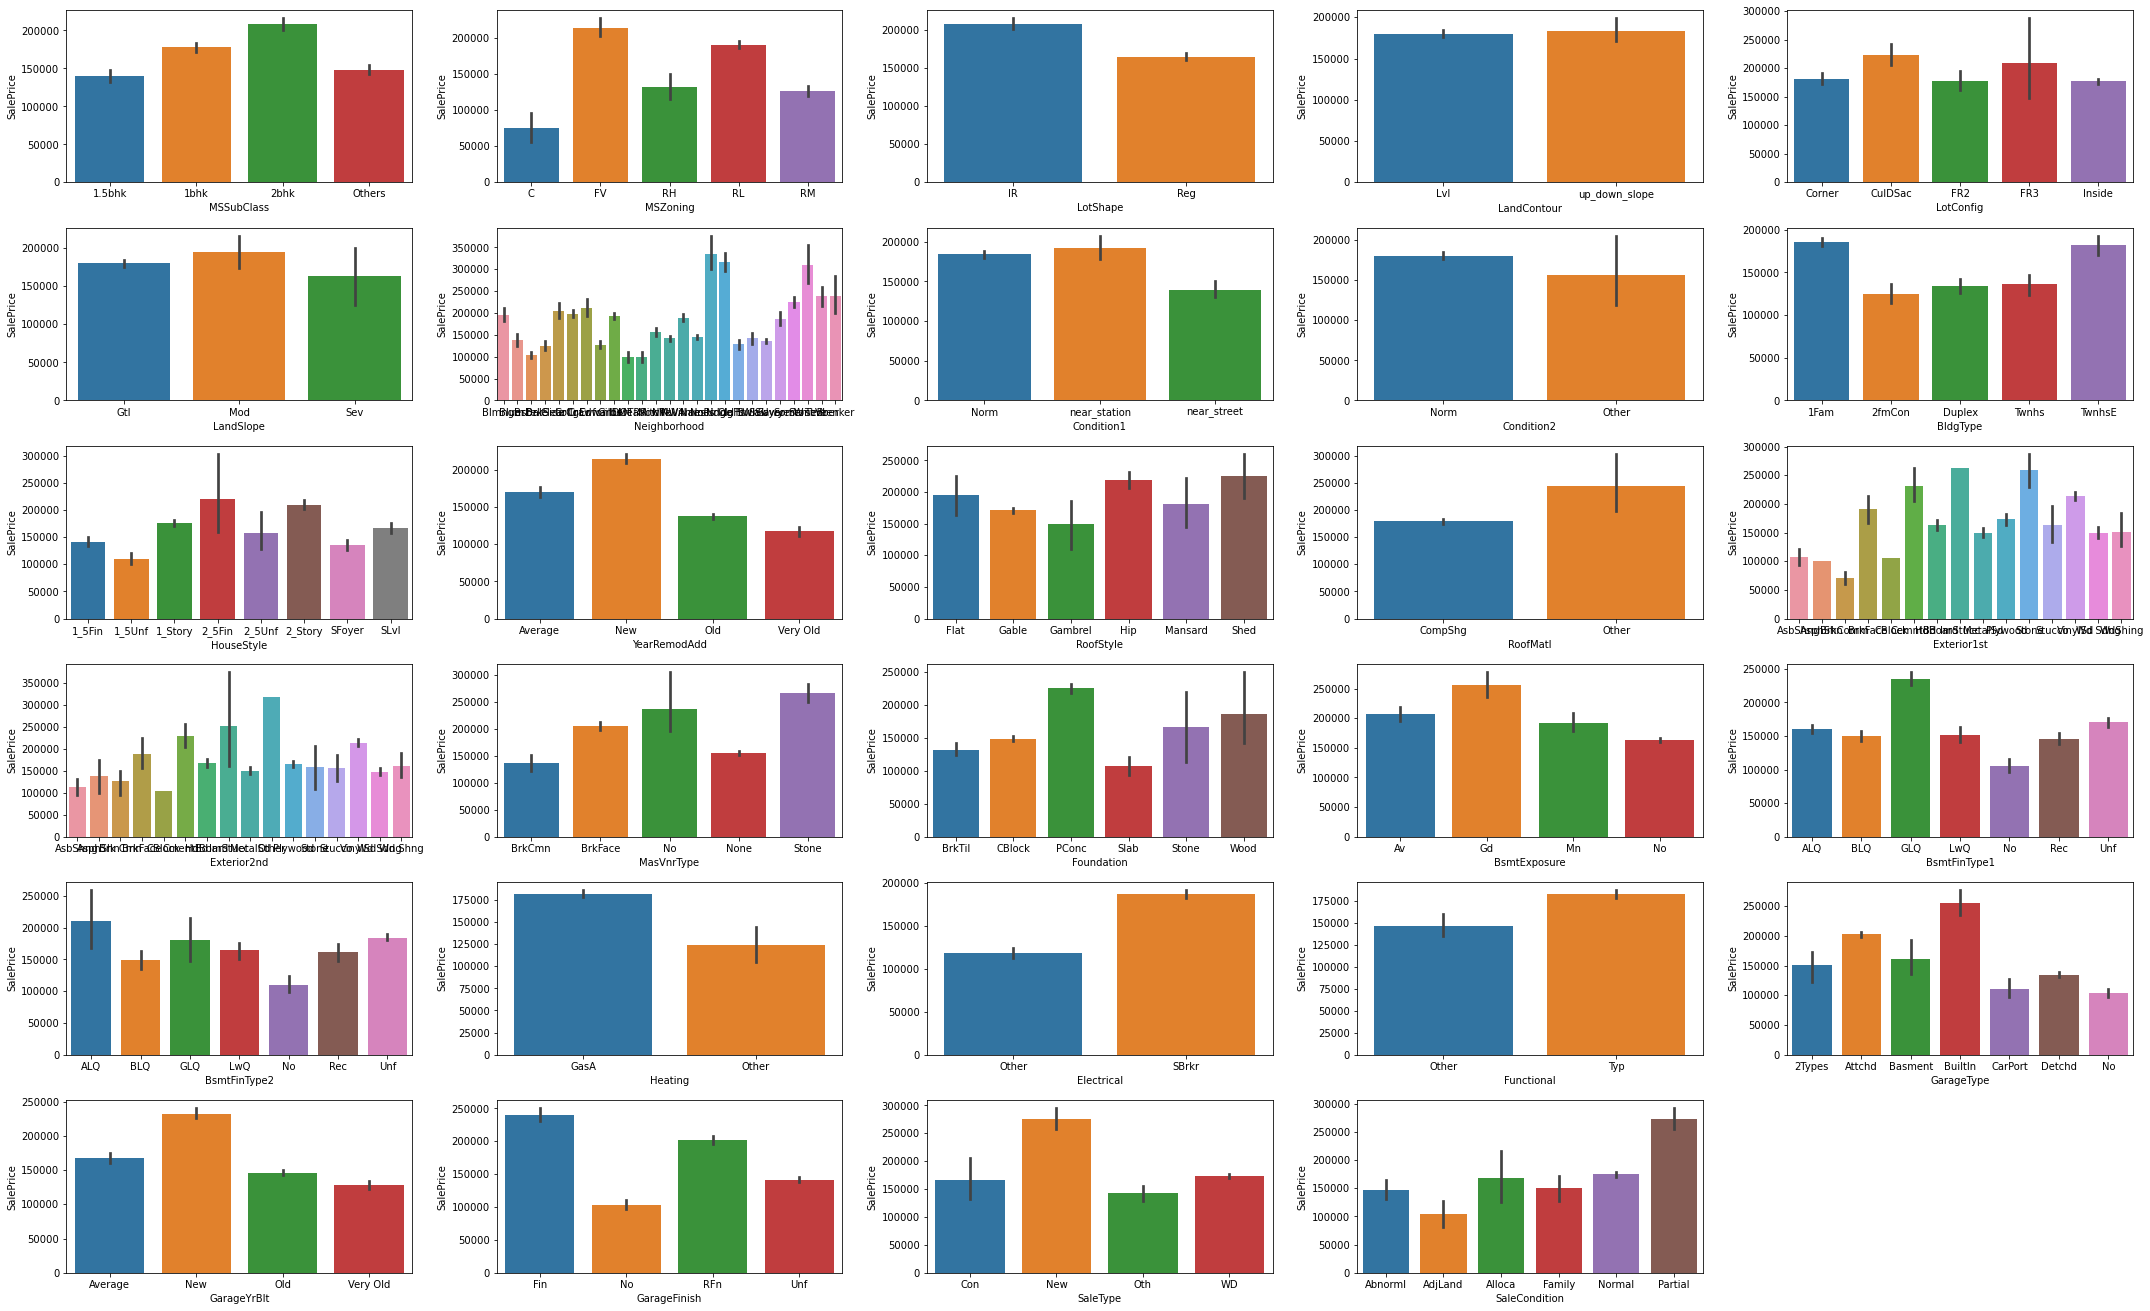

In [127]:
count=1
plt.subplots(figsize=(30,30))
for i in suprise.select_dtypes('category').columns:
    plt.subplot(10,5,count)
    sns.barplot(suprise[i],suprise.SalePrice)
    count+=1
    
plt.tight_layout()
plt.show()

### Observations:

   > 2 Bhk homes have in average higher selling price
   
   > FV or Floating Village Residential have higher selling price
   
   > New construction houses have higher selling price
   
   > PConc or Poured Contrete have higher selling price
   
   > Finisehd Builtin Garage which are New tend to  have higher selling price
   
   > Basement with GLQ or Good Living Quarters have higher selling prices in the market

## 4) Data Preparation

In [128]:
suprise.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age,TotalHouseSF,TotalBath,TotalPorchSF
0,1,2bhk,RL,65,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2_Story,2,2,New,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,2,1,PConc,2,1,No,GLQ,706,Unf,0,150,856,GasA,1,1,SBrkr,856,854,1710,1,2,1,3,1,2,8,Typ,0,3,Attchd,New,RFn,2,548,1,1,1,0,61,0,2,2008,WD,Normal,208500,18,2566,4.0,61
1,2,1bhk,RL,80,9600,Reg,Lvl,FR2,Gtl,Veenker,near_street,Norm,1Fam,1_Story,2,1,Average,Gable,CompShg,MetalSd,MetalSd,None,0,1,1,CBlock,2,1,Gd,ALQ,978,Unf,0,284,1262,GasA,1,1,SBrkr,1262,0,1262,0,2,0,3,1,1,6,Typ,1,1,Attchd,Average,RFn,2,460,1,1,1,298,0,0,5,2007,WD,Normal,181500,45,2524,2.0,298
2,3,2bhk,RL,68,11250,IR,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2_Story,2,2,New,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,2,1,PConc,2,1,Mn,GLQ,486,Unf,0,434,920,GasA,1,1,SBrkr,920,866,1786,1,2,1,3,1,2,6,Typ,1,1,Attchd,New,RFn,2,608,1,1,1,0,42,0,9,2008,WD,Normal,223500,20,2706,4.0,42
3,4,2bhk,RL,60,9550,IR,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2_Story,2,2,Old,Gable,CompShg,Wd Sdng,Wd Shng,None,0,1,1,BrkTil,1,2,No,ALQ,216,Unf,0,540,756,GasA,2,1,SBrkr,961,756,1717,1,1,0,3,1,2,7,Typ,1,2,Detchd,New,Unf,3,642,1,1,1,0,35,272,2,2006,WD,Abnorml,140000,106,2473,2.5,307
4,5,2bhk,RL,84,14260,IR,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2_Story,1,2,New,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,2,1,PConc,2,1,Av,GLQ,655,Unf,0,490,1145,GasA,1,1,SBrkr,1145,1053,2198,1,2,1,4,1,2,9,Typ,1,1,Attchd,New,RFn,3,836,1,1,1,192,84,0,12,2008,WD,Normal,250000,21,3343,4.0,276
5,6,1.5bhk,RL,85,14115,IR,Lvl,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1_5Fin,2,2,New,Gable,CompShg,VinylSd,VinylSd,None,0,1,1,Wood,2,1,No,GLQ,732,Unf,0,64,796,GasA,1,1,SBrkr,796,566,1362,1,1,1,1,1,1,5,Typ,0,3,Attchd,New,Unf,2,480,1,1,1,40,30,0,10,2009,WD,Normal,143000,28,2158,3.0,390
6,7,1bhk,RL,75,10084,Reg,Lvl,Inside,Gtl,Somerst,Norm,Norm,1Fam,1_Story,1,2,New,Gable,CompShg,VinylSd,VinylSd,Stone,186,2,1,PConc,1,1,Av,GLQ,1369,Unf,0,317,1686,GasA,1,1,SBrkr,1694,0,1694,1,2,0,3,1,2,7,Typ,1,2,Attchd,New,RFn,2,636,1,1,1,255,57,0,8,2007,WD,Normal,307000,17,3380,3.5,312
7,8,2bhk,RL,69,10382,IR,Lvl,Corner,Gtl,NWAmes,near_station,Norm,1Fam,2_Story,2,2,Old,Gable,CompShg,HdBoard,HdBoard,Stone,240,1,1,CBlock,2,1,Mn,ALQ,859,BLQ,32,216,1107,GasA,1,1,SBrkr,1107,983,2090,1,2,1,3,1,1,7,Typ,2,1,Attchd,Old,RFn,2,484,1,1,1,235,204,228,11,2009,WD,Normal,200000,48,3197,4.0,667
8,9,1.5bhk,RM,51,6120,Reg,Lvl,Inside,Gtl,OldTown,near_street,Norm,1Fam,1_5Fin,2,2,Very Old,Gable,CompShg,BrkFace,Wd Shng,None,0,1,1,BrkTil,1,1,No,Unf,0,Unf,0,952,952,GasA,2,1,Other,1022,752,1774,0,2,0,2,2,1,8,Other,2,1,Detchd,Very Old,Unf,2,468,2,1,1,90,0,205,4,2008,WD,Abnorml,129900,90,2726,2.0,295
9,10,2bhk,RL,50,7420,Reg,Lvl,Corner,Gtl,BrkSide,near_street,Other,2fmCon,1_5Unf,2,2,Very Old,Gable,CompShg,MetalSd,MetalSd,None,0,1,1,BrkTil,1,1,No,GLQ,851,Unf,0,140,991,GasA,1,1,SBrkr,1077,0,1077,1,1,0,2,2,1,5,Typ,2,1,Attchd,Very Old,RFn,1,205,2,1,1,0,4,0,1,2008,WD,Normal,118000,82,2068,2.5,4


### As we have lot of categorical columns, we would have to create dummy variables for the same. Let's identify those columns first

In [129]:
dummy_cat_cols = suprise.select_dtypes('category').columns
dummy_cat_cols

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'Electrical', 'Functional',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')

### Function to create dummy variables using pd.get_dummies function for multiple features

In [130]:
for i in dummy_cat_cols:
    temp = pd.get_dummies(suprise[i], drop_first = True, prefix=i)
    suprise = pd.concat([suprise, temp], axis = 1)
    suprise.drop([i], axis = 1, inplace = True)

In [131]:
suprise.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,Age,TotalHouseSF,TotalBath,TotalPorchSF,MSSubClass_1bhk,MSSubClass_2bhk,MSSubClass_Others,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Other,Electrical_SBrkr,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,GarageYrBlt_New,GarageYrBlt_Old,GarageYrBlt_Very Old,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65,8450,2,2,196,2,1,2,1,706,0,150,856,1,1,856,854,1710,1,2,1,3,1,2,8,0,3,2,548,1,1,1,0,61,0,2,2008,208500,18,2566,4.0,61,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
1,2,80,9600,2,1,0,1,1,2,1,978,0,284,1262,1,1,1262,0,1262,0,2,0,3,1,1,6,1,1,2,460,1,1,1,298,0,0,5,2007,181500,45,2524,2.0,298,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,3,68,11250,2,2,162,2,1,2,1,486,0,434,920,1,1,920,866,1786,1,2,1,3,1,2,6,1,1,2,608,1,1,1,0,42,0,9,2008,223500,20,2706,4.0,42,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
3,4,60,9550,2,2,0,1,1,1,2,216,0,540,756,2,1,961,756,1717,1,1,0,3,1,2,7,1,2,3,642,1,1,1,0,35,272,2,2006,140000,106,2473,2.5,307,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
4,5,84,14260,1,2,350,2,1,2,1,655,0,490,1145,1,1,1145,1053,2198,1,2,1,4,1,2,9,1,1,3,836,1,1,1,192,84,0,12,2008,250000,21,3343,4.0,276,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0


## 5) Scaling Variables

In [132]:
from sklearn.preprocessing import MinMaxScaler

In [133]:
scale_cols = ['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF'
             ,'1stFlrSF','2ndFlrSF','GrLivArea','GrLivArea','GarageArea','WoodDeckSF'
             ,'OpenPorchSF','EnclosedPorch','TotalHouseSF','TotalPorchSF']

In [134]:
suprise[scale_cols]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,TotalHouseSF,TotalPorchSF
0,65,8450,196,706,0,150,856,856,854,1710,1710,548,0,61,0,2566,61
1,80,9600,0,978,0,284,1262,1262,0,1262,1262,460,298,0,0,2524,298
2,68,11250,162,486,0,434,920,920,866,1786,1786,608,0,42,0,2706,42
3,60,9550,0,216,0,540,756,961,756,1717,1717,642,0,35,272,2473,307
4,84,14260,350,655,0,490,1145,1145,1053,2198,2198,836,192,84,0,3343,276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62,7917,0,0,0,953,953,953,694,1647,1647,460,0,40,0,2600,40
1456,85,13175,119,790,163,589,1542,2073,0,2073,2073,500,349,0,0,3615,349
1457,66,9042,0,275,0,877,1152,1188,1152,2340,2340,252,0,60,0,3492,60
1458,68,9717,0,49,1029,0,1078,1078,0,1078,1078,240,366,0,112,2156,478


In [135]:
scaler = MinMaxScaler()

suprise[scale_cols] = scaler.fit_transform(suprise[scale_cols])

suprise.head()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,YrSold,SalePrice,Age,TotalHouseSF,TotalBath,TotalPorchSF,MSSubClass_1bhk,MSSubClass_2bhk,MSSubClass_Others,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,...,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_Other,Electrical_SBrkr,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No,GarageYrBlt_New,GarageYrBlt_Old,GarageYrBlt_Very Old,GarageFinish_No,GarageFinish_RFn,GarageFinish_Unf,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,0.150685,0.127907,2,2,0.12250,2,1,2,1,0.312389,0.0,0.064212,0.266999,1,1,0.180373,0.413559,0.316905,1,2,1,3,1,2,8,0,3,2,0.394245,1,1,1,0.000000,0.111517,0.000000,2,2008,208500,18,0.298396,4.0,0.059396,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
1,2,0.202055,0.148479,2,1,0.00000,1,1,2,1,0.432743,0.0,0.121575,0.393637,1,1,0.320663,0.000000,0.213726,0,2,0,3,1,1,6,1,1,2,0.330935,1,1,1,0.347725,0.000000,0.000000,5,2007,181500,45,0.292781,2.0,0.290166,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,3,0.160959,0.177996,2,2,0.10125,2,1,2,1,0.215044,0.0,0.185788,0.286962,1,1,0.202488,0.419370,0.334408,1,2,1,3,1,2,6,1,1,2,0.437410,1,1,1,0.000000,0.076782,0.000000,9,2008,223500,20,0.317112,4.0,0.040896,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0
3,4,0.133562,0.147585,2,2,0.00000,1,1,1,2,0.095575,0.0,0.231164,0.235808,2,1,0.216655,0.366102,0.318517,1,1,0,3,1,2,7,1,2,3,0.461871,1,1,1,0.000000,0.063985,0.492754,2,2006,140000,106,0.285963,2.5,0.298929,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
4,5,0.215753,0.231843,1,2,0.21875,2,1,2,1,0.289823,0.0,0.209760,0.357143,1,1,0.280235,0.509927,0.429295,1,2,1,4,1,2,9,1,1,3,0.601439,1,1,1,0.224037,0.153565,0.000000,12,2008,250000,21,0.402273,4.0,0.268744,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0


## 6) Split into Train & Test

In [136]:
# drop id features
suprise.drop(columns = 'Id',inplace = True,axis = 1)

In [137]:
y = suprise.pop('SalePrice')
X = suprise

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = .70,random_state = 100)

In [140]:
print('X_Train Shape:' + str(X_train.shape))
print('X_test Shape:' + str(X_test.shape))
print('y_train Shape:' + str(y_train.shape))
print('y_test Shape:' + str(y_test.shape))

X_Train Shape:(1017, 179)
X_test Shape:(437, 179)
y_train Shape:(1017,)
y_test Shape:(437,)


## 7) Model Building and Evaluation

In [141]:
from sklearn.linear_model import LinearRegression

In [142]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [143]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-230412.64613073834
[ 3.35878622e+04  6.13247888e+04 -1.20028824e+04 -1.06177321e+04
  2.64645458e+04 -2.88557294e+03 -1.25799575e+03 -1.18427113e+04
 -2.69532464e+03  5.15652254e+04 -2.77879765e+03  1.20974732e+03
  3.59536592e+04 -1.05922762e+03  5.18121750e+03  1.16224036e+05
  1.26989911e+05  6.39853674e+04 -1.14087543e+02  1.10094867e+03
  1.44781530e+03 -7.02709718e+03 -3.05426742e+04 -7.37642513e+03
 -4.50552907e+02  2.42813227e+03  1.57368386e+03  5.98445560e+03
 -5.00461802e+03  2.07623061e+03 -3.95153544e+03  1.00499832e+03
 -2.10837761e+04 -2.00916250e+04 -2.23688391e+04 -2.22865898e+02
  1.56812071e+02 -3.33006439e+02  9.54350209e+04  1.65372500e+03
  4.21746922e+04  1.29490315e+03  2.55194975e+03  8.04580542e+03
  4.49268386e+04  4.61413066e+04  3.83374728e+04  2.96927105e+04
  5.62155829e+02 -2.03364422e+03  1.11435280e+04 -5.08726537e+03
 -2.76218646e+04 -1.36601715e+02 -1.46087009e+03 -3.31247447e+04
  5.86305998e+03  8.08313773e+03  3.99015967e+03 -2.86623026e+04
 -8.5

In [144]:
from sklearn.metrics import r2_score,mean_squared_error

In [145]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)


metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Score for Train: '+ str(r2_train_lr))

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Score for Test: '+ str(r2_test_lr))


R2 Score for Train: 0.924993587420036
R2 Score for Test: 0.7965060628703189


### Looking at the above resultset we can clearly see that model is overfitting, this can be understoor as the R2 Score of Train is very high compared to R2 score of Test

## Ridge Regression

In [146]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [147]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 11, 12, 13, 14, 15, 20, 50, 100]}

ridge = Ridge()

#Cross-Validation

folds = 5
model_cv_ridge = GridSearchCV(estimator  = ridge
                           ,param_grid = params
                           ,scoring    = 'neg_mean_absolute_error'
                           ,cv         = folds
                           ,return_train_score = True
                           ,verbose = 1
                           )

model_cv_ridge.fit(X_train,y_train)

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    3.4s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 11, 12, 13,
                                   14, 15, 20, 50, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [148]:
#Below dataframe shows us the result of ridge regression with different alpha values and for kfolds each
cv_ridge_results = pd.DataFrame(model_cv_ridge.cv_results_)

cv_ridge_results[['param_alpha','mean_train_score','mean_test_score']]
cv_ridge_results['percent_diff'] = (cv_ridge_results.mean_train_score-cv_ridge_results.mean_test_score)
cv_ridge_results[['param_alpha','mean_train_score','mean_test_score','percent_diff']].sort_values(by = 'percent_diff')

,param_alpha,mean_train_score,mean_test_score,percent_diff
30,100,-21313.126891,-22596.035542,1282.908652
29,50,-19731.883748,-21453.828235,1721.944487
28,20,-17704.918932,-19956.128351,2251.209419
27,15,-17150.113681,-19558.652753,2408.539072
26,14,-17025.636008,-19467.811364,2442.175356
25,13,-16895.588422,-19374.924478,2479.336055
24,12,-16760.121830,-19277.771046,2517.649215
23,11,-16616.319443,-19174.368638,2558.049195
22,10,-16464.864588,-19070.496831,2605.632243
21,9,-16304.598238,-18963.340254,2658.742016


#### lets look at the best parameter given by Ridge

In [149]:
print('Best Alpha parameter: '+ str(model_cv_ridge.best_params_))

Best Alpha parameter: {'alpha': 3.0}


In [150]:
#Fitting Ridge model for alpha = 2 and printing coefficients which have been penalised
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=3)

In [151]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

0.9176650778386197
0.8259079077786591


### Here we can see that the Train Dataset is giving r2 Score of 91.68% and Test Dataset is giving r2 Score of 82.66% which is better than what linear regression gave us earlier. We can clearly see that overfitting has reduced

### Doubling the Optimal Lambda/Alpha Value (Subjective Question)

In [152]:
#Fitting Ridge model for alpha = 2 and printing coefficients which have been penalised
alpha = 6
double_ridge = Ridge(alpha=alpha)

double_ridge.fit(X_train, y_train)

Ridge(alpha=6)

In [153]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = double_ridge.predict(X_train)
y_pred_test = double_ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

0.9106900843951735
0.8337705760063714


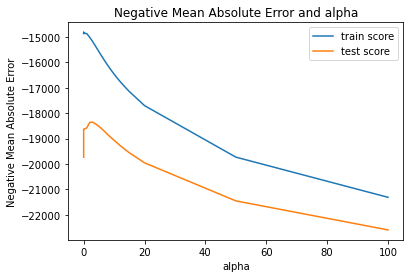

In [154]:
# plotting mean test and train scoes with alpha 
cv_ridge_results['param_alpha'] = cv_ridge_results['param_alpha'].astype('int32')
plt.plot(cv_ridge_results['param_alpha'], cv_ridge_results['mean_train_score'])
plt.plot(cv_ridge_results['param_alpha'], cv_ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

### Our Target here is to fit Test data better with some somewards less fitting in Train Dataset
   **Let's manually try few higher value Alpha's**

### alpha = 10

In [155]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
# print(ridge.coef_)

Ridge(alpha=10)

In [156]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

0.9027219599700556
0.8381888093929512


### alpha = 15

In [157]:
#Fitting Ridge model for alpha = 15 and printing coefficients which have been penalised
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
# print(ridge.coef_)

Ridge(alpha=15)

In [158]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

0.8943709643676476
0.8401613400468414


In [159]:
df_ridge_coeff = pd.DataFrame(ridge.coef_,X_train.columns)
df_ridge_coeff.rename(columns = {'0':'coef'}, inplace = True) 

df_ridge_coeff.reset_index(level=0, inplace=True)
df_ridge_coeff.rename(columns={ df_ridge_coeff.columns[0]: "Features" }, inplace = True)
df_ridge_coeff.rename(columns={ df_ridge_coeff.columns[1]: "Coef" }, inplace = True)
df_ridge_coeff.reset_index(drop=True, inplace=True)

### Below are the top most important features given by Ridge Regression

In [160]:
df_ridge_coeff.sort_values(by = 'Coef',ascending= False)

,Features,Coef
17,GrLivArea,35676.811371
15,1stFlrSF,33286.944537
38,TotalHouseSF,33058.824580
9,BsmtFinSF1,31724.605278
70,Neighborhood_NoRidge,29587.154705
16,2ndFlrSF,29569.296994
12,TotalBsmtSF,28037.115433
4,MasVnrArea,20865.365189
141,BsmtExposure_Gd,19687.852271
1,LotArea,18938.195495


## Lasso Regression

### Let's Try Lasso Regression with Alpha range, as we know Lasso penalizes the co-efficent and bring down values of co-efficients not just close to Zero, but it also makes the value to 0 of irrelevant parameters, which inturn help us in feature selection

In [169]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 11, 12, 13, 14, 15, 20, 50, 60, 70, 80, 90, 100,180,500,1000]}

lasso = Lasso()

#Cross-Validation

folds = 5
lasso_model_cv = GridSearchCV(estimator  = lasso
                             ,param_grid = params
                             ,scoring    = 'r2'
                             ,cv         = folds
                             ,return_train_score = True
                             ,verbose = 1
                             )

lasso_model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 38 candidates, totalling 190 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 190 out of 190 | elapsed:   31.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 11, 12, 13,
                                   14, 15, 20, 50, ...]},
             return_train_score=True, scoring='r2', verbose=1)

### Best hyperparameter alpha

In [170]:
print(lasso_model_cv.best_params_)

{'alpha': 90}


In [176]:
#Fitting Ridge model for alpha = 90 and printing coefficients which have been penalised

alpha =90

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=90)

In [189]:
#Fitting Ridge model for alpha = 180 [Double of Optimal Value(Subjective Question)]
alpha =180

double_lasso = Lasso(alpha=alpha)
        
double_lasso.fit(X_train, y_train) 

Lasso(alpha=180)

In [171]:
#Below dataframe shows us the result of ridge regression with different alpha values and for kfolds each
cv_lasso_results = pd.DataFrame(lasso_model_cv.cv_results_)

cv_lasso_results[['param_alpha','mean_train_score','mean_test_score']]
cv_lasso_results['percent_diff'] = (cv_lasso_results.mean_train_score-cv_lasso_results.mean_test_score)
cv_lasso_results[['param_alpha','mean_train_score','mean_test_score','percent_diff']].sort_values(by = 'percent_diff')

,param_alpha,mean_train_score,mean_test_score,percent_diff
37,1000,0.822521,0.800556,0.021965
36,500,0.878136,0.855983,0.022153
35,180,0.909997,0.882197,0.027800
34,100,0.917246,0.885105,0.032141
33,90,0.918135,0.885132,0.033003
32,80,0.919065,0.885004,0.034061
31,70,0.920133,0.884899,0.035233
30,60,0.921302,0.884506,0.036796
29,50,0.922598,0.883926,0.038672
28,20,0.927511,0.878589,0.048922


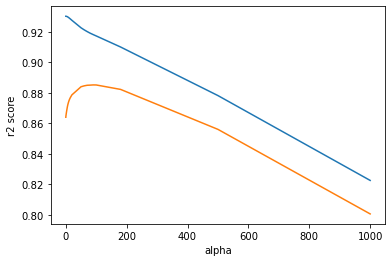

In [172]:
# plotting mean test and train r2 scores with alpha 
cv_lasso_results['param_alpha'] = cv_lasso_results['param_alpha'].astype('float32')
plt.plot(cv_lasso_results['param_alpha'], cv_lasso_results['mean_train_score'])
plt.plot(cv_lasso_results['param_alpha'], cv_lasso_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2 score')
plt.show()

In [177]:
df_lasso_coeff = pd.DataFrame(lasso.coef_,X_train.columns)
df_lasso_coeff.rename(columns = {'0':'coef'}, inplace = True) 

df_lasso_coeff.reset_index(level=0, inplace=True)
df_lasso_coeff.rename(columns={ df_lasso_coeff.columns[0]: "Features" }, inplace = True)
df_lasso_coeff.rename(columns={ df_lasso_coeff.columns[1]: "Coef" }, inplace = True)
df_lasso_coeff.reset_index(drop=True, inplace=True)

### Below are the list of Features which have highest postive coreleation with our Target Variable 'SalePrice'

In [178]:
df_lasso_coeff[df_lasso_coeff.Coef > 0].sort_values(by = 'Coef',ascending= False)

,Features,Coef
38,TotalHouseSF,176104.919243
17,GrLivArea,150720.024814
1,LotArea,41153.772255
9,BsmtFinSF1,38909.613105
147,BsmtFinType1_No,36518.970158
70,Neighborhood_NoRidge,31690.980040
16,2ndFlrSF,29663.863257
77,Neighborhood_StoneBr,27905.740752
71,Neighborhood_NridgHt,27717.969784
4,MasVnrArea,24992.534851


### Below are the list of Features which have Negative coreleation with our Target Variable 'SalePrice'

In [179]:
df_lasso_coeff[df_lasso_coeff.Coef < 0].sort_values(by = 'Coef',ascending= False)

,Features,Coef
54,LandSlope_Mod,-24.793972
47,MSZoning_RM,-63.855307
8,BsmtCond,-138.360848
49,LandContour_up_down_slope,-197.186928
48,LotShape_Reg,-221.335853
97,RoofStyle_Gable,-229.777102
35,MoSold,-267.948329
37,Age,-359.892357
114,Exterior1st_VinylSd,-488.587093
78,Neighborhood_Timber,-513.770542


### Below are the list of Features which have been selected by Lasso as NON Relevant Features as there Coefficients are 0

In [180]:
df_lasso_coeff[df_lasso_coeff.Coef == 0].sort_values(by = 'Coef',ascending= False)

,Features,Coef
6,ExterCond,-0.0
121,Exterior2nd_CmentBd,0.0
129,Exterior2nd_VinylSd,-0.0
128,Exterior2nd_Stucco,0.0
127,Exterior2nd_Stone,0.0
126,Exterior2nd_Plywood,-0.0
125,Exterior2nd_Other,0.0
124,Exterior2nd_MetalSd,-0.0
122,Exterior2nd_HdBoard,-0.0
120,Exterior2nd_CBlock,-0.0


### Below are the top 5 features according to Lasso Regression

In [181]:
df_lasso_coeff[df_lasso_coeff.Coef > 0].sort_values(by = 'Coef',ascending= False).head(5)

,Features,Coef
38,TotalHouseSF,176104.919243
17,GrLivArea,150720.024814
1,LotArea,41153.772255
9,BsmtFinSF1,38909.613105
147,BsmtFinType1_No,36518.970158


### Let's observe the changes in the coefficients after regularization

In [193]:
summary_betas = pd.DataFrame(index=X_train.columns)

In [194]:
summary_betas.rows = X_train.columns

In [195]:
summary_betas['Linear'] = lm.coef_
summary_betas['Ridge'] = ridge.coef_ # Alpha = 3
summary_betas['Lasso'] = lasso.coef_ # Alpha = 90

In [196]:
summary_betas

,Linear,Ridge,Lasso
LotFrontage,3.358786e+04,12022.378927,9682.081030
LotArea,6.132479e+04,18938.195495,41153.772255
OverallQual,-1.200288e+04,-19219.023416,-14815.589616
OverallCond,-1.061773e+04,-8287.514038,-10177.731359
MasVnrArea,2.646455e+04,20865.365189,24992.534851
ExterQual,-2.885573e+03,-786.285333,-1715.363089
ExterCond,-1.257996e+03,-80.387507,-0.000000
BsmtQual,-1.184271e+04,-10937.058953,-10388.510268
BsmtCond,-2.695325e+03,-238.194785,-138.360848
BsmtFinSF1,5.156523e+04,31724.605278,38909.613105


# <center>========= The End =========